# Cumulative plots for pristine data 

# !!!! IMP: converting into raw string solves the issue of the backslash " \ "

1. This is an important step towards the building a file subsystem detection protocol to adapt to the standard MATLAB output system

2. This can further developed to fully integrate the entire architecture


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# scipy.io is useful for usual .mat loading 
import scipy.io as sio
import os.path
# plotting imports
import matplotlib.pyplot as plt
# Now call in the pandas 
import pandas as pd  

# import the h5py for reading v7.3 .mat versions of files  
import h5py
plt.style.use(["classic"])
import pandas as pd
# makes all latex into regular font type and removes default "italics"... very useful
plt.rcParams['mathtext.default'] = 'regular'

# import the file subsystem reading package 
import glob 

# ~~~~~~~~~~~~~~~~~~~ import user defined APIs~~~~~~~~~~~~~~~~~~~~~
from cumulativePlottingFunctions import cumulative_bin_data as cbd

In [24]:
# extract the data for the 5um particles 
mainPath_5  = r"D:\5um\density\bindata_mat_files"; 
master_array_5 = cbd(mainPath_5, 0)

# extract the datd for the 7um particles 
mainPath_7 = r"E:\9.5.22_Vortex_Experiments\7_um_vortices\density\bindata_mat_files";
master_array_7 = cbd(mainPath_7, 0)

# extract the datd for the 10um particles 
mainPath_10 =   r"E:\9.5.22_Vortex_Experiments\10_um_vortices\density\data_mat_files";
master_array_10 = cbd(mainPath_10, 0) 

In [32]:
Ar_10_um = np.pi*(5/0.8621)**2
Ar_7_um = np.pi*(3.5/0.8621)**2
Ar_5_um = np.pi*(2.5/0.8621)**2

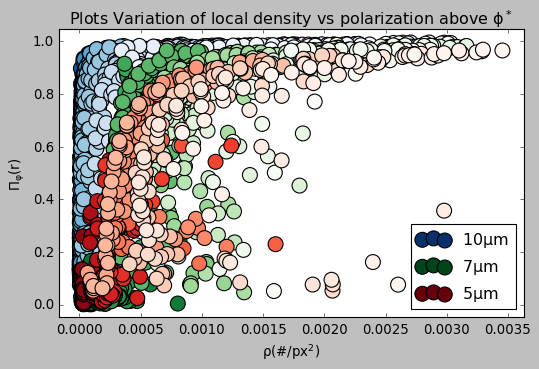

In [25]:
#colors = plt.cm.plasma(np.linspace(0, 1, len(np.unique(master_array['fileID']))))
plt.figure(figsize = (7.5,4.5))
plt.margins(0.05, 0.05)
# extract all the density above 0.00057 which is the critical flocking density
#x_values = master_array['$\rho$'][master_array['$\rho$']>0.0002]
#y_values = master_array['$\Pi$'][master_array['$\rho$']>0.0002]

#function_val = 1-0.0002/x_values 
#plt.scatter(-np.log(function_val),-np.log(y_values), s=150, c = master_array['fileID'][master_array['$\rho$']>0.0002], cmap='plasma')
plt.scatter(master_array_10['$\rho$'],master_array_10['$\Pi$'], s=180, c = np.flip(master_array_10['fileID']), cmap='Blues', label='10$\mu$m')
plt.scatter(master_array_7['$\rho$'],master_array_7['$\Pi$'], s=180, c = np.flip(master_array_7['fileID']), cmap='Greens',label='7$\mu$m')
plt.scatter(master_array_5['$\rho$'],master_array_5['$\Pi$'], s=180, c = np.flip(master_array_5['fileID']), cmap='Reds', label='5$\mu$m')

plt.ylabel(r'$\Pi_{\varphi}$(r)')
plt.xlabel(r'$\rho$(#/${px}^2$)')
plt.title('Plots Variation of local density vs polarization above $\phi^*$')
plt.legend(numpoints =2, loc = 'best')
#plt.savefig('Plots\Density_vs_local_polzn_all_together.pdf')

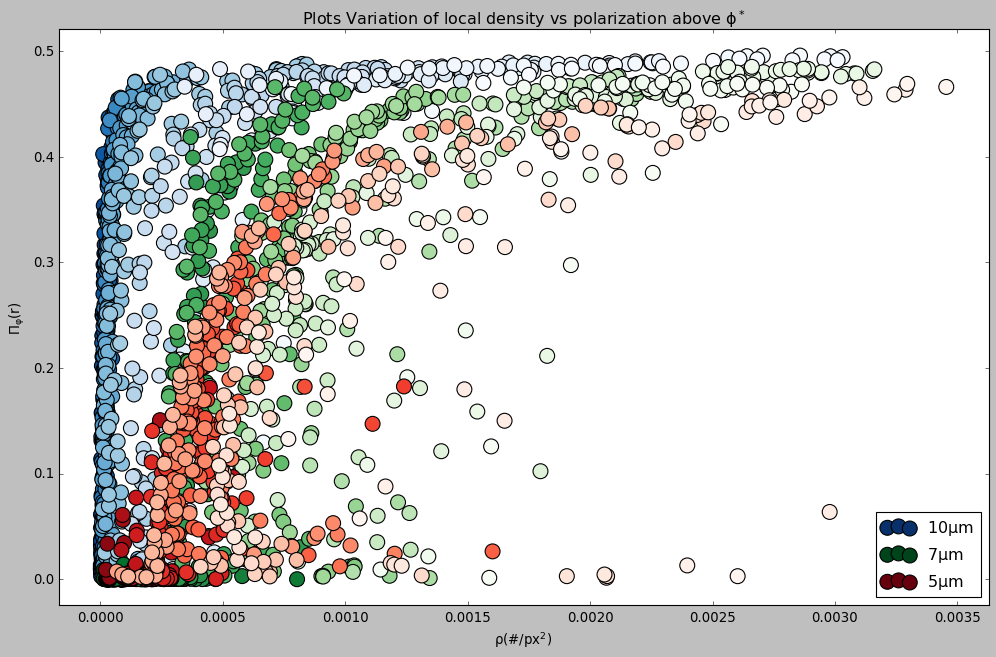

In [28]:
#colors = plt.cm.plasma(np.linspace(0, 1, len(np.unique(master_array['fileID']))))
plt.figure(figsize = (15,9))
plt.margins(0.05, 0.05)

plt.scatter(master_array_10['$\rho$'],master_array_10['$\Pi$']**2/2,s=180, c = np.flip(master_array_10['fileID']), cmap='Blues', label='10$\mu$m')
plt.scatter(master_array_7['$\rho$'],master_array_7['$\Pi$']**2/2, s=180, c = np.flip(master_array_7['fileID']), cmap='Greens',label='7$\mu$m')
plt.scatter(master_array_5['$\rho$'],master_array_5['$\Pi$']**2/2, s=180, c = np.flip(master_array_5['fileID']), cmap='Reds', label='5$\mu$m')

plt.ylabel(r'$\Pi_{\varphi}$(r)')
plt.xlabel(r'$\rho$(#/${px}^2$)')
plt.title('Plots Variation of local density vs polarization above $\phi^*$')
plt.legend(numpoints =2, loc = 'best')
#plt.savefig('Plots\Density_vs_local_polzn_all_together.pdf')
plt.savefig('Plots\Density_vs_local_polzn_all_together')

In [29]:
def pol_fit_linear(rho_inv,phi_star):
    return phi_star*rho_inv

# the ones that fit 
rho_inv = np.linspace(200,20000,20000);
phi_transform_5   = pol_fit_linear(rho_inv, 0.00035)
phi_transform_7   = pol_fit_linear(rho_inv, 0.00025)
phi_transform_10  = pol_fit_linear(rho_inv, 0.00001)

phi_transform_51   = pol_fit_linear(rho_inv, 0.00022)
phi_transform_71   = pol_fit_linear(rho_inv, 0.00017)
phi_transform_101  = pol_fit_linear(rho_inv, 0.00001)

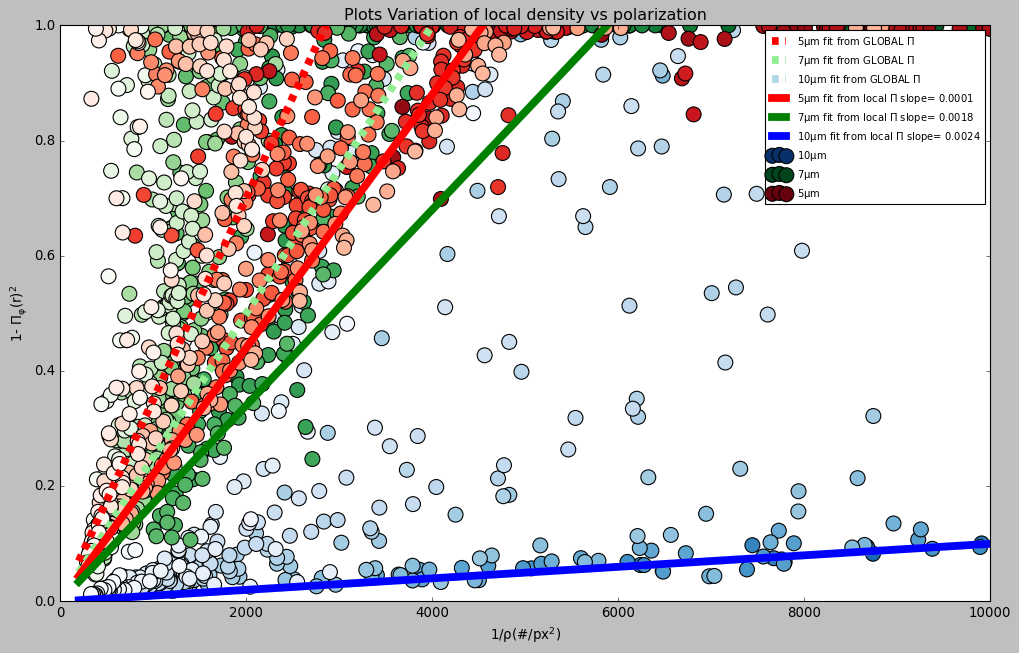

In [30]:
#colors = plt.cm.plasma(np.linspace(0, 1, len(np.unique(master_array['fileID']))))
plt.figure(figsize = (15,9))
plt.margins(0.05, 0.05)

plt.scatter(1/master_array_10['$\rho$'],1 - master_array_10['$\Pi$']**1.5, s=180, c = np.flip(master_array_10['fileID']), cmap='Blues', label='10$\mu$m') 
plt.scatter(1/master_array_7['$\rho$'],1- master_array_7['$\Pi$']**3.2, s=180, c = np.flip(master_array_7['fileID']), cmap='Greens',label='7$\mu$m')
plt.scatter(1/master_array_5['$\rho$'],1- master_array_5['$\Pi$']**2, s=180, c = np.flip(master_array_5['fileID']), cmap='Reds', label='5$\mu$m')
plt.plot(rho_inv, phi_transform_5 ,  color = 'red', linestyle = '--', linewidth = 7, label = '5$\mu$m fit from GLOBAL $\Pi$')
plt.plot(rho_inv, phi_transform_7 ,  color = 'lightgreen', linestyle = '--', linewidth = 7, label = '7$\mu$m fit from GLOBAL $\Pi$')
plt.plot(rho_inv, phi_transform_10 , color = 'lightblue', linestyle = '--', linewidth = 7, label = '10$\mu$m fit from GLOBAL $\Pi$')
plt.plot(rho_inv, phi_transform_51 , color = 'r', linestyle = '-',  linewidth = 7, label = '5$\mu$m fit from local $\Pi$ slope= 0.0001')
plt.plot(rho_inv, phi_transform_71 , color = 'g', linestyle = '-',  linewidth = 7, label = '7$\mu$m fit from local $\Pi$ slope= 0.0018')
plt.plot(rho_inv, phi_transform_101, color = 'b', linestyle = '-',  linewidth = 7, label = '10$\mu$m fit from local $\Pi$ slope= 0.0024')
plt.xlim(0, 10000)
plt.ylim(0,1)
plt.ylabel(r'1- $\Pi_{\varphi}$(r)$^2$')
plt.xlabel(r'1/$\rho$(#/${px}^2$)')
plt.title('Plots Variation of local density vs polarization')
plt.legend(numpoints =3, fontsize = 9)
#plt.savefig('Plots\Density_vs_local_polzn_all_together_fit.pdf')
plt.savefig('Plots\Density_vs_local_polzn_all_together_fit')

## Trying to estimate the value of the beta 

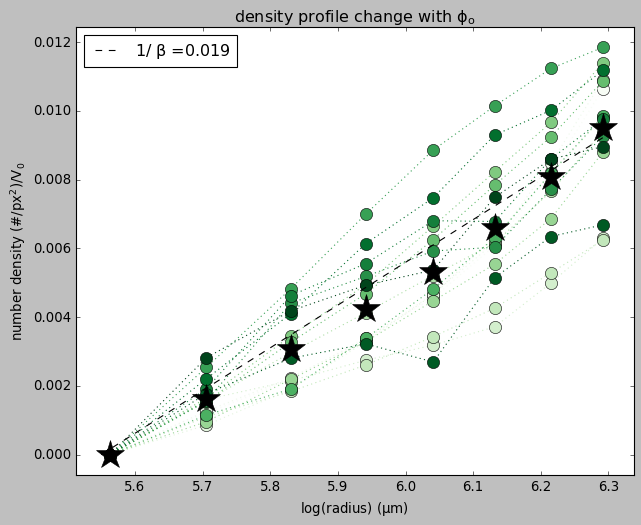

In [73]:
master_array_7_crop  = master_array_7 [master_array_7['centres']>250]
master_array_7_crop  = master_array_7_crop[master_array_7_crop['centres']<550]
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID']>20]
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID']<45]
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 42] # culprint
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 41] # culprint
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 40] # culprint
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 38] # culprint
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 37] # culprint
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 36] # culprint
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 31] # culprint
master_array_7_crop  = master_array_7_crop[master_array_7_crop['fileID'] != 24] # culprint

# transform further
master_array_7_crop['rhoV0'] = master_array_7_crop['$\rho$']/master_array_7_crop['V$_0$'] # compute the Beta only
colors_7 = plt.cm.Greens(np.linspace(0,1,len(np.unique(master_array_7_crop['fileID']))))

 

plt.figure(figsize = (9,7)) 
plt.ylabel('number density (#/px$^2$)/V$_0$')
plt.xlabel('log(radius) ($\mu$m)')
plt.margins(0.05,)
plt.title("density profile change with $\phi_o$")

c= 0

A = np.zeros(8)

for i in np.unique(master_array_7_crop['fileID']):
    
    # Curve
    curvefit = master_array_7_crop[master_array_7_crop['fileID'] == i]['rhoV0'] - master_array_7_crop[master_array_7_crop['fileID'] == i]['rhoV0'].values[0] 
    A = A + curvefit

    plt.plot(np.log(master_array_7_crop[master_array_7_crop['fileID'] == i]['centres']),
         curvefit*Ar_7_um, marker = 'o', markersize = '11',
         color =colors_7[c], linestyle = ':', label = '')
    c=c+1;  
A = A/len(np.unique(master_array_7_crop['fileID']))
plt.plot(np.log(master_array_7_crop[master_array_7_crop['fileID'] == 32]['centres']), A*Ar_7_um, linestyle = 'none', markersize = 27, marker = '*', color = 'black')
plt.plot([5.55,6.3], [0, 0.00018*Ar_7_um], color = 'k', linestyle= '--',label = r'1/ $ \beta $ =' + str(round(0.00036*Ar_7_um,3)))
plt.legend(loc = 'best')
plt.savefig('check beta 7.pdf')

In [19]:
#A = master_array_7_crop[master_array_7_crop['fileID'] == 26]['rhoV0'].values 
type(A)

pandas.core.series.Series

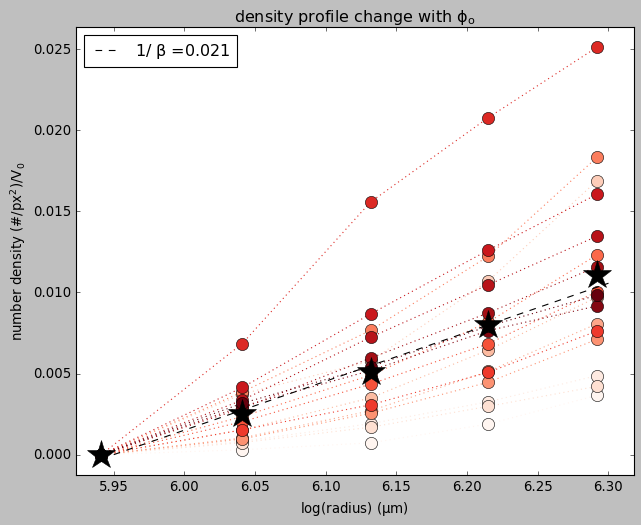

In [66]:
master_array_5_crop  = master_array_5[master_array_5['centres']>350]
master_array_5_crop  = master_array_5_crop[master_array_5_crop['centres']<550]
master_array_5_crop  = master_array_5_crop[master_array_5_crop['fileID']>25]
master_array_5_crop  = master_array_5_crop[master_array_5_crop['fileID'] != 41] # culprint

# transform further
master_array_5_crop['rhoV0'] = master_array_5_crop['$\rho$']/master_array_5_crop['V$_0$'] # compute the Beta only

plt.figure(figsize = (9,7)) 
plt.ylabel('number density (#/px$^2$)/V$_0$')
plt.xlabel('log(radius) ($\mu$m)')
plt.margins(0.05,)
plt.title("density profile change with $\phi_o$")

colors_5 = plt.cm.Reds(np.linspace(0,1,len(np.unique(master_array_5_crop['fileID']))))
c= 0
A = np.zeros(5)
for i in np.unique(master_array_5_crop['fileID']):
    
    # Curve
    curvefit = master_array_5_crop[master_array_5_crop['fileID'] == i]['rhoV0'] - master_array_5_crop[master_array_5_crop['fileID'] == i]['rhoV0'].values[0] 
    A = A + curvefit
    
    plt.plot(np.log(master_array_5_crop[master_array_5_crop['fileID'] == i]['centres']),
             curvefit*Ar_5_um, marker = 'o', markersize = '11',
             color =colors_5[c], linestyle = ':', label = '')
    c=c+1; 
    
A = A/len(np.unique(master_array_5_crop['fileID']))
plt.plot(np.log(master_array_5_crop[master_array_5_crop['fileID'] == 27]['centres']), A*Ar_5_um, linestyle = 'none', markersize = 27, marker = '*', color = 'black')
plt.plot([5.95,6.3], [0, 0.0004*Ar_5_um], color = 'k', linestyle= '--', label = r'1/ $ \beta $ =' + str(round(0.0004*Ar_7_um,3)))
plt.legend(loc = 'best')
plt.savefig('check beta 5.pdf')

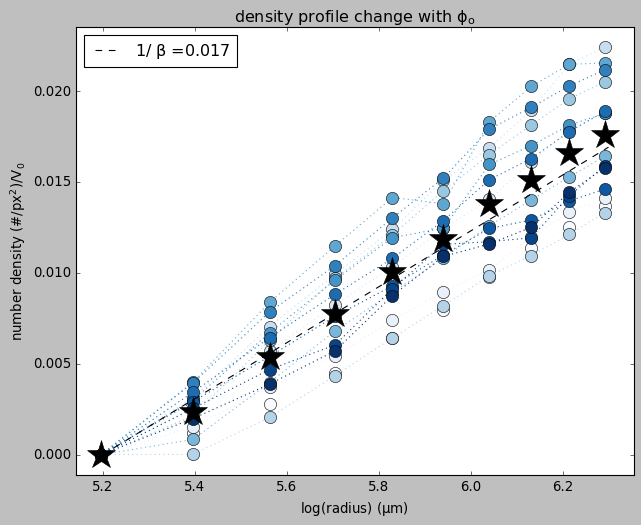

In [76]:
master_array_10_crop  = master_array_10[master_array_10['centres']>150]
master_array_10_crop  = master_array_10_crop[master_array_10_crop['centres']<550]
master_array_10_crop  = master_array_10_crop[master_array_10_crop['fileID']>45]
master_array_10_crop  = master_array_10_crop[master_array_10_crop['fileID'] != 55] # culprint
plt.figure(figsize = (9,7)) 
plt.ylabel('number density (#/px$^2$)/V$_0$')
plt.xlabel('log(radius) ($\mu$m)')
plt.margins(0.05,)
plt.title("density profile change with $\phi_o$")

# transform further
master_array_10_crop['rhoV0'] = master_array_10_crop['$\rho$']/master_array_10_crop['V$_0$'] # compute the Beta only

colors_10 = plt.cm.Blues(np.linspace(0,1,len(np.unique(master_array_10_crop['fileID']))))

c= 0
A = np.zeros(10)
for i in np.unique(master_array_10_crop['fileID']):
    
    # Curve
    curvefit = master_array_10_crop[master_array_10_crop['fileID'] == i]['rhoV0'] - master_array_10_crop[master_array_10_crop['fileID'] == i]['rhoV0'].values[0] 
    A = A + curvefit
    
    plt.plot(np.log(master_array_10_crop[master_array_10_crop['fileID'] == i]['centres']),
             curvefit*Ar_10_um, marker = 'o', markersize = '11',
             color =colors_10[c], linestyle = ':', label = '')
    c=c+1; 
    
A = A/len(np.unique(master_array_10_crop['fileID']))
plt.plot(np.log(master_array_10_crop[master_array_10_crop['fileID'] == 50]['centres']), A*Ar_10_um,linestyle = 'none', markersize = 27, marker = '*', color = 'black')
plt.plot([5.2,6.3], [0, 0.00016*Ar_10_um], color = 'k', linestyle= '--', label = r'1/ $ \beta $ =' + str(round(0.00016*Ar_10_um,3)))
plt.legend(loc = 'best')
plt.savefig('check beta 10.pdf')

In [22]:
colors = plt.cm.plasma(np.linspace(1, 0, len(np.unique(master_array['fileID']))))
plt.figure(figsize = (9,7)) 
plt.ylabel('polarisation ($\pi$)')
plt.xlabel('radius ($\mu$m)')
plt.margins(0.05,)
plt.title("polrization change with $\phi_o$")
# loop ove rall the data sets for a particular voltage
for i in np.flip(np.unique(master_array['fileID'])):
    plt.plot(master_array[master_array['fileID'] == i]['centres'],master_array[master_array['fileID'] == i]['$\Pi$'], marker = 'o', markersize = '11', markeredgecolor = 'none',color =colors[int(i)-1],linestyle = ':', label = '')
#plt.savefig('Plots\polarisation_trend_cumulative_140_5um.pdf'); 

NameError: name 'master_array' is not defined

In [ ]:
# Legacy section ~~~~ vault these
# find the path off all the .mat files of the .mat files
# !!!! converting into raw string solves the issue of the backslash "\"

mainPath  = r"D:\5um\density\bindata_mat_files"; 
#mainPath  = r"E:\9.5.22_Vortex_Experiments\7_um_vortices\density\bindata_mat_files";
#mainPath  = r"E:\9.5.22_Vortex_Experiments\10_um_vortices\density\data_mat_files";
mainPath  = os.path.normpath(mainPath).replace('\\','/');


# get all the files within the folder with a particular voltage 
# add  voltage if you want a particular voltage 

#file_name_list = glob.glob(mainPath + '\*140*.mat');  
str1 = r'\*';
str3 = r'*.mat';
str2 = str(140);
A = str1 + str2 + str3; 
file_name_list = glob.glob(mainPath + A);   

# convert all the file path into the standard interpretable formats
File_path_list = [];
for file_path in file_name_list:
    File_path_list.append(os.path.normpath(file_path).replace('\\','/'))
    
# read the data from each .mat file and save it in a dictonary     
master_array = pd.DataFrame();       # main dataset 
temporary_data_set = pd.DataFrame(); # read the chunks 

# specif the name of the headings of the table
table_names = ['fileID','#_fraction','$\Pi$','V$_0$','$\rho$','centres'];

serial_number = 0;
for file_path in File_path_list:
    
    serial_number += 1; 
    # extract the data from each file
    f = h5py.File(file_path, 'r')
    MATLAB_data = {}
    for k, v in f.items():
        MATLAB_data[k] = np.array(v)
    '''
    MATLAB_data has dat in the following order:
    1. fraction of particle in the bin
    2. Bin averaged polarization
    3. Bin averaged velocity
    4. Bin averaged number density
    5. Bin centres in the radial directions
    '''  
    # set the fist ID to the serial of the fil that your are reading from the folder of he .mat files.
    temporary_data_set[table_names[0]] = serial_number*np.ones(len(MATLAB_data['binData'][0]));
    
    # fill te other columns with the data from the dats of the other columns of bin data 
    for i in range(len(MATLAB_data['binData'])):
        temporary_data_set[table_names[i+1]] = MATLAB_data['binData'][i]
        
    # keep adding the read data into the master array 
    master_array = pd.concat([master_array,temporary_data_set]) 